<a href="https://colab.research.google.com/github/Yashkaka/MNIST_Fashion/blob/main/MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
sklearn.__version__

'1.0.2'

In [ ]:
from sklearn.datasets import fetch_openml
fashion_mnist = fetch_openml(data_id=40996) 

In [ ]:
string = "0 T-shirt/top \n1 Trouser \n2 Pullover \n3 Dress \n4 Coat \n5 Sandal \n6 Shirt \n7 Sneaker \n8 Bag \n9 Ankle boot"


In [ ]:
x,y = fashion_mnist['data'],fashion_mnist['target']
labels_s = '0 T-shirt/top \n1 Trouser \n2 Pullover \n3 Dress \n4 Coat \n5 Sandal \n6 Shirt \n7 Sneaker \n8 Bag \n9 Ankle boot'

fashion_label_translation = {
    int(k): v for k, v in [
        item.split(maxsplit=1) for item in labels_s.split('\n')
    ]
}


def translate_label(y, translation=fashion_label_translation):
    return pd.Series(y).apply(lambda y: translation[int(y)]).values

fashion_label_translation
translate_label(y)


['Ankle boot', 'T-shirt/top ', 'T-shirt/top ', 'Dress ', 'T-shirt/top ', ..., 'Ankle boot', 'Trouser ', 'Bag ', 'Trouser ', 'Sandal ']
Length: 70000
Categories (10, object): ['T-shirt/top ', 'Trouser ', 'Pullover ', 'Dress ', ..., 'Shirt ', 'Sneaker ',
                          'Bag ', 'Ankle boot']

In [ ]:
len(fashion_mnist['data'])


70000

In [ ]:

X, y = fashion_mnist['data'], fashion_mnist['target']
X.shape

(70000, 784)

In [ ]:
y = y.astype("float")


In [ ]:
X.iloc[69998]


pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 69998, Length: 784, dtype: float64

In [ ]:
fashion_label_translation[y[69998]]


'Trouser '

In [ ]:

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
def viz(n):
    plt.imshow(X.iloc[n].to_numpy().reshape(28,28))
    return

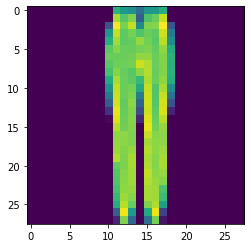

In [ ]:
viz(69998)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train)

SGDClassifier(random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


'T-shirt/top '

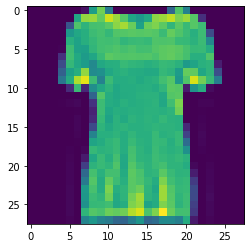

In [ ]:
viz(10)
fashion_label_translation[clf.predict(X.iloc[10].to_numpy().reshape(1, -1))[0]]

In [ ]:
y_pred = clf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test,y_pred))

0.8127857142857143


In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[1055    5   93  139    3    4   65    0   30    0]
 [   7 1324   12   50    0    1    5    0    3    0]
 [   7    3 1240   32   66    0   41    0   18    0]
 [  28   18   24 1336   19    1   16    0    6    1]
 [   7    2  454  157  596    0  131    0   10    0]
 [   0    2    1    3    0 1313    1   59   21   49]
 [ 186    5  320  142   52    0  658    0   44    0]
 [   0    0    0    0    0   39    0 1198    6  116]
 [   4    3   15   14    2   12    7    5 1278    2]
 [   0    0    0    2    0   24    0   24    3 1381]]


In [ ]:
fashion_label_translation


{0: 'T-shirt/top ',
 1: 'Trouser ',
 2: 'Pullover ',
 3: 'Dress ',
 4: 'Coat ',
 5: 'Sandal ',
 6: 'Shirt ',
 7: 'Sneaker ',
 8: 'Bag ',
 9: 'Ankle boot'}

In [ ]:
labels = ["T-shirt/top","trouser","pullover","dress","coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]


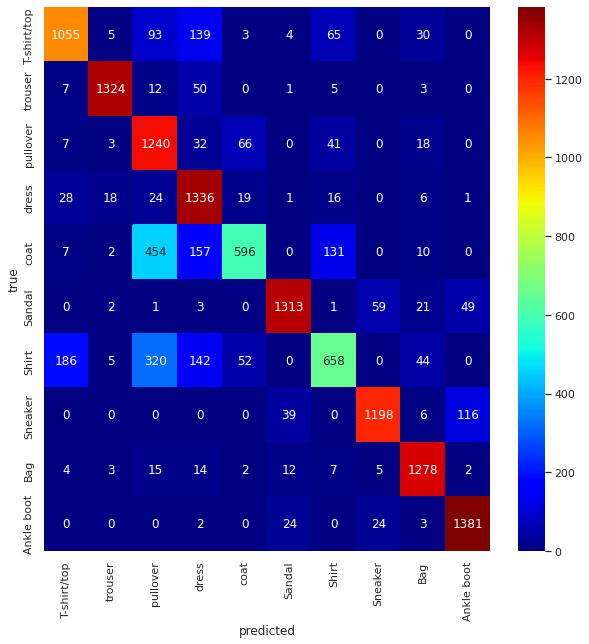

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})
y = sns.heatmap(cf_matrix,annot=True,cmap='jet', fmt="d",xticklabels=labels, yticklabels=labels)
y.set(xlabel='predicted', ylabel='true')
plt.show()